In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [3]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()
inspector = inspect(engine)
#inspector.get_table_names()
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [4]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table, assign classes
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

('2017-08-23',)
2016-08-23


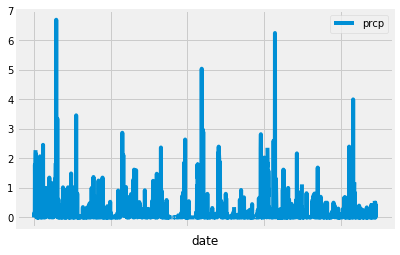

In [8]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(year_ago)

# Perform a query to retrieve the data and precipitation scores
data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).\
order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(data)
precipitation_df
# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(x='date', y='prcp')

In [15]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station).count()
print("There are " + str(station_count) + " stations.")

There are 9 stations.


In [10]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

# When I initally started this, I had trouble with the sqlalchemy query, so I tried importing the info into a pandas
# dataframe to get an idea of what the numbers should look like.
active_stations = session.query(Measurement.station, Measurement.date).all()
active_station_df = pd.DataFrame(active_stations)
active_station_df
USC00519281_df = active_station_df.loc[active_station_df["station"] == "USC00519281",:]
USC00519397_df = active_station_df.loc[active_station_df["station"] == "USC00519397",:]
USC00513117_df = active_station_df.loc[active_station_df["station"] == "USC00513117",:]
USC00519523_df = active_station_df.loc[active_station_df["station"] == "USC00519523",:]
USC00516128_df = active_station_df.loc[active_station_df["station"] == "USC00516128",:]
USC00514830_df = active_station_df.loc[active_station_df["station"] == "USC00514830",:]
USC00511918_df = active_station_df.loc[active_station_df["station"] == "USC00511918",:]
USC00517948_df = active_station_df.loc[active_station_df["station"] == "USC00517948",:]
USC00518838_df = active_station_df.loc[active_station_df["station"] == "USC00518838",:]
USC00519281 = len(USC00519281_df)
USC00519397 = len(USC00519397_df)
USC00513117 = len(USC00513117_df)
USC00519523 = len(USC00519523_df)
USC00516128 = len(USC00516128_df)
USC00514830 = len(USC00514830_df)
USC00511918 = len(USC00511918_df)
USC00517948 = len(USC00517948_df)
USC00518838 = len(USC00518838_df)

print("USC00519281 Observations Counts = " + str(USC00519281))
print("USC00519397 Observations Counts = " + str(USC00519397))
print("USC00513117 Observations Counts = " + str(USC00513117))
print("USC00519523 Observations Counts = " + str(USC00519523))
print("USC00516128 Observations Counts = " + str(USC00516128))
print("USC00514830 Observations Counts = " + str(USC00514830))
print("USC00511918 Observations Counts = " + str(USC00511918))
print("USC00517948 Observations Counts = " + str(USC00517948))
print("USC00518838 Observations Counts = " + str(USC00518838))

# SQLAlchemy query is not as clean as I wanted it to look, but I did get it to work.
print()
print("SQLalchemy query results: ")
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by((Measurement.station)).\
    order_by(func.count(Measurement.station).desc()).all()

USC00519281 Observations Counts = 2772
USC00519397 Observations Counts = 2724
USC00513117 Observations Counts = 2709
USC00519523 Observations Counts = 2669
USC00516128 Observations Counts = 2612
USC00514830 Observations Counts = 2202
USC00511918 Observations Counts = 1979
USC00517948 Observations Counts = 1372
USC00518838 Observations Counts = 511

SQLalchemy query results: 


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [11]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temp = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),\
                     func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print(temp)

min_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all() 
max_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all() 
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all() 

print()
print("Min Temperature = " + str(min_temp))
print("Max Temperature = " + str(max_temp))
print("Average Temperature = " + str(avg_temp))

[(54.0, 85.0, 71.66378066378067)]

Min Temperature = [(54.0,)]
Max Temperature = [(85.0,)]
Average Temperature = [(71.66378066378067,)]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124efd978>]],
      dtype=object)

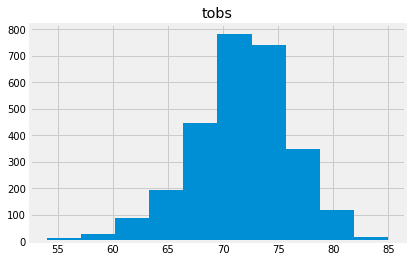

In [12]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
highest_station_data = session.query(Measurement.station, Measurement.date, Measurement.tobs).filter\
(Measurement.station == 'USC00519281').all()
hsd_df = pd.DataFrame(highest_station_data)
hsd_df.hist()